#Farhan Anas
#1301183427
#IF-42-GAB

In [ ]:
import pandas as pd
import numpy as np
from time import time
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer , PorterStemmer
from nltk.corpus import stopwords
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/nlp/universal_studio_branches.csv")
df

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [ ]:
df = df.drop(['reviewer', 'written_date', 'title', 'branch'], axis = 1)

In [ ]:
def ubah_rating(rating):
  if rating >=5:
    return 1
  else:
    return 0

In [ ]:
df['sentiment'] = df.rating.apply(lambda x: ubah_rating(int(x)))
df

,rating,review_text,sentiment
0,2.0,We went to Universal over Memorial Day weekend...,0
1,1.0,The food service is horrible. I’m not reviewin...,0
2,2.0,I booked this vacation mainly to ride Hagrid m...,0
3,4.0,When a person tries the test seat for the ride...,0
4,5.0,"Ok, I can't stress enough to anyone and everyo...",1
...,...,...,...
50899,4.0,This is my first visit to a Universal Studio t...,0
50900,4.0,We finally visited Singapore's very first them...,0
50901,4.0,We visited during the first week of its 'soft ...,0
50902,4.0,We visited on the 3rd day of the 'soft' openin...,0


In [ ]:
fig = px.bar(df.groupby('sentiment').size().reset_index(name='count'),
             x='sentiment', y='count', width=480, height=480,
             barmode='group', title='Distribusi label')
fig.show(renderer='colab')

# Preprocessing

## Drop Duplicate and Null Data

In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,rating,review_text,sentiment
0,2.0,We went to Universal over Memorial Day weekend...,0
1,1.0,The food service is horrible. I’m not reviewin...,0
2,2.0,I booked this vacation mainly to ride Hagrid m...,0
3,4.0,When a person tries the test seat for the ride...,0
4,5.0,"Ok, I can't stress enough to anyone and everyo...",1
...,...,...,...
50844,4.0,This is my first visit to a Universal Studio t...,0
50845,4.0,We finally visited Singapore's very first them...,0
50846,4.0,We visited during the first week of its 'soft ...,0
50847,4.0,We visited on the 3rd day of the 'soft' openin...,0


## Case Folding

In [ ]:
df['review_text'] = df['review_text'].str.lower()
df

,rating,review_text,sentiment
0,2.0,we went to universal over memorial day weekend...,0
1,1.0,the food service is horrible. i’m not reviewin...,0
2,2.0,i booked this vacation mainly to ride hagrid m...,0
3,4.0,when a person tries the test seat for the ride...,0
4,5.0,"ok, i can't stress enough to anyone and everyo...",1
...,...,...,...
50844,4.0,this is my first visit to a universal studio t...,0
50845,4.0,we finally visited singapore's very first them...,0
50846,4.0,we visited during the first week of its 'soft ...,0
50847,4.0,we visited on the 3rd day of the 'soft' openin...,0


## Tokenizing and Removing Unwanted Char

In [ ]:
def remove_unwanted_char(text):
    html_tag = re.compile(r'<.*?>')
    http_link = re.compile(r'https://\S+')
    www_link = re.compile(r'www\.\S+')
    punct = re.compile(r"[^\w\s]")
    number = re.compile(r"\d")
    space = re.compile(r"\s\s+")

    text = re.sub(html_tag, r" ", text)
    text = re.sub(http_link, r" ", text)
    text = re.sub(www_link, r" ", text)
    text = re.sub(punct, r" ", text)
    text = re.sub(number, r" ", text)
    text = re.sub(space, r" ", text)
    return text

df['review_text'] = df['review_text'].apply(remove_unwanted_char)

def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['review_text'] = df['review_text'].apply(remove_number)

def remove_whitespace_LT(text):
    return text.strip()

df['review_text'] = df['review_text'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['tokenized'] = df['review_text'].apply(lambda x: word_tokenize(x))

df

,rating,review_text,sentiment,tokenized
0,2.0,we went to universal over memorial day weekend...,0,"[we, went, to, universal, over, memorial, day,..."
1,1.0,the food service is horrible i m not reviewing...,0,"[the, food, service, is, horrible, i, m, not, ..."
2,2.0,i booked this vacation mainly to ride hagrid m...,0,"[i, booked, this, vacation, mainly, to, ride, ..."
3,4.0,when a person tries the test seat for the ride...,0,"[when, a, person, tries, the, test, seat, for,..."
4,5.0,ok i can t stress enough to anyone and everyon...,1,"[ok, i, can, t, stress, enough, to, anyone, an..."
...,...,...,...,...
50844,4.0,this is my first visit to a universal studio t...,0,"[this, is, my, first, visit, to, a, universal,..."
50845,4.0,we finally visited singapore s very first them...,0,"[we, finally, visited, singapore, s, very, fir..."
50846,4.0,we visited during the first week of its soft o...,0,"[we, visited, during, the, first, week, of, it..."
50847,4.0,we visited on the rd day of the soft opening t...,0,"[we, visited, on, the, rd, day, of, the, soft,..."


## Stopword Removal

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['no_stopwords'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df

,rating,review_text,sentiment,tokenized,no_stopwords
0,2.0,we went to universal over memorial day weekend...,0,"[we, went, to, universal, over, memorial, day,...","[went, universal, memorial, day, weekend, tota..."
1,1.0,the food service is horrible i m not reviewing...,0,"[the, food, service, is, horrible, i, m, not, ...","[food, service, horrible, reviewing, food, wai..."
2,2.0,i booked this vacation mainly to ride hagrid m...,0,"[i, booked, this, vacation, mainly, to, ride, ...","[booked, vacation, mainly, ride, hagrid, motor..."
3,4.0,when a person tries the test seat for the ride...,0,"[when, a, person, tries, the, test, seat, for,...","[person, tries, test, seat, rides, gets, green..."
4,5.0,ok i can t stress enough to anyone and everyon...,1,"[ok, i, can, t, stress, enough, to, anyone, an...","[ok, stress, enough, anyone, everyone, go, uni..."
...,...,...,...,...,...
50844,4.0,this is my first visit to a universal studio t...,0,"[this, is, my, first, visit, to, a, universal,...","[first, visit, universal, studio, theme, park,..."
50845,4.0,we finally visited singapore s very first them...,0,"[we, finally, visited, singapore, s, very, fir...","[finally, visited, singapore, first, theme, pa..."
50846,4.0,we visited during the first week of its soft o...,0,"[we, visited, during, the, first, week, of, it...","[visited, first, week, soft, opening, unfortun..."
50847,4.0,we visited on the rd day of the soft opening t...,0,"[we, visited, on, the, rd, day, of, the, soft,...","[visited, rd, day, soft, opening, ticket, sale..."


## Final Data

In [ ]:
df['clean'] = df['no_stopwords'].apply(lambda x: " ".join(x))
df

,rating,review_text,sentiment,tokenized,no_stopwords,clean
0,2.0,we went to universal over memorial day weekend...,0,"[we, went, to, universal, over, memorial, day,...","[went, universal, memorial, day, weekend, tota...",went universal memorial day weekend total trai...
1,1.0,the food service is horrible i m not reviewing...,0,"[the, food, service, is, horrible, i, m, not, ...","[food, service, horrible, reviewing, food, wai...",food service horrible reviewing food wait time...
2,2.0,i booked this vacation mainly to ride hagrid m...,0,"[i, booked, this, vacation, mainly, to, ride, ...","[booked, vacation, mainly, ride, hagrid, motor...",booked vacation mainly ride hagrid motorcycle ...
3,4.0,when a person tries the test seat for the ride...,0,"[when, a, person, tries, the, test, seat, for,...","[person, tries, test, seat, rides, gets, green...",person tries test seat rides gets green light ...
4,5.0,ok i can t stress enough to anyone and everyon...,1,"[ok, i, can, t, stress, enough, to, anyone, an...","[ok, stress, enough, anyone, everyone, go, uni...",ok stress enough anyone everyone go universal ...
...,...,...,...,...,...,...
50844,4.0,this is my first visit to a universal studio t...,0,"[this, is, my, first, visit, to, a, universal,...","[first, visit, universal, studio, theme, park,...",first visit universal studio theme park went p...
50845,4.0,we finally visited singapore s very first them...,0,"[we, finally, visited, singapore, s, very, fir...","[finally, visited, singapore, first, theme, pa...",finally visited singapore first theme park uni...
50846,4.0,we visited during the first week of its soft o...,0,"[we, visited, during, the, first, week, of, it...","[visited, first, week, soft, opening, unfortun...",visited first week soft opening unfortunately ...
50847,4.0,we visited on the rd day of the soft opening t...,0,"[we, visited, on, the, rd, day, of, the, soft,...","[visited, rd, day, soft, opening, ticket, sale...",visited rd day soft opening ticket sales limit...


# Feature Extraction

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_tfidf = tfidf.fit_transform(df['clean'].values.tolist())
text_tfidf.shape

(50849, 39434)

## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x = text_tfidf
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x Train : ', (x_train.shape))
print('y Train : ', (y_train.shape))
print('x Test : ', (x_test.shape))
print('y Test : ', (y_test.shape))

x Train :  (40679, 39434)
y Train :  (40679,)
x Test :  (10170, 39434)
y Test :  (10170,)


# Classification

## Decision Tree

In [ ]:
from sklearn import tree
start = time()
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
predictions_DT = clf.predict(x_test)

print('DT Accuracy:', accuracy_score(y_test, predictions_DT))
print('DT Precision:', precision_score(y_test, predictions_DT, average=None))
print('DT Recall:', recall_score(y_test, predictions_DT, average=None))
print('DT f1_score:', f1_score(y_test, predictions_DT, average=None))
print('Time : {} menit'.format(round((time() - start) / 60, 2)))

DT Accuracy: 0.6156342182890856
DT Precision: [0.57872051 0.64387365]
DT Recall: [0.55420378 0.66642716]
DT f1_score: [0.56619687 0.65495631]
Time : 0.77 menit


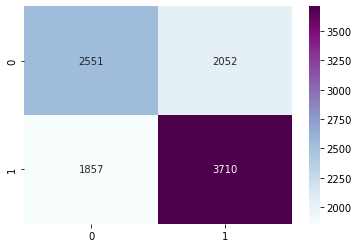

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
cmdt = confusion_matrix(y_test,predictions_DT)
sns.heatmap(cmdt,cmap='BuPu',annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      4603
           1       0.64      0.67      0.65      5567

    accuracy                           0.62     10170
   macro avg       0.61      0.61      0.61     10170
weighted avg       0.61      0.62      0.61     10170



## K Nearest Neighbor

In [ ]:
from sklearn import neighbors
start = time()
clf = neighbors.KNeighborsRegressor(n_neighbors=1)
clf.fit(x_train,y_train)
predictions_KNN = clf.predict(x_test)

print('KNN Accuracy:', accuracy_score(y_test, predictions_KNN))
print('KNN Precision:', precision_score(y_test, predictions_KNN, average=None))
print('KNN Recall:', recall_score(y_test, predictions_KNN, average=None))
print('KNN f1_score:', f1_score(y_test, predictions_KNN, average=None))
print('Time : {} menit'.format(round((time() - start) / 60, 2)))

KNN Accuracy: 0.591740412979351
KNN Precision: [0.56422672 0.60624718]
KNN Recall: [0.4303715  0.72516616]
KNN f1_score: [0.48829184 0.66039588]
Time : 0.32 menit


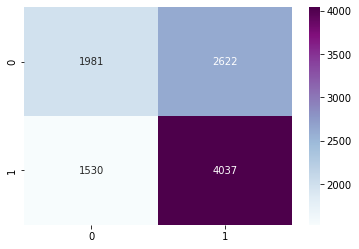

In [ ]:
cmknn = confusion_matrix(y_test,predictions_KNN)
sns.heatmap(cmknn,cmap='BuPu',annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, predictions_KNN))

              precision    recall  f1-score   support

           0       0.56      0.43      0.49      4603
           1       0.61      0.73      0.66      5567

    accuracy                           0.59     10170
   macro avg       0.59      0.58      0.57     10170
weighted avg       0.59      0.59      0.58     10170



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start = time()
RFC = RandomForestClassifier(random_state=0).fit(x_train,y_train)
predictions_RFC=RFC.predict(x_test)

print('Random Forest Accuracy:', accuracy_score(y_test, predictions_RFC))
print('Random Forest Precision:', precision_score(y_test, predictions_RFC, average=None))
print('Random Forest Recall:', recall_score(y_test, predictions_RFC, average=None))
print('Random Forest f1_score:', f1_score(y_test, predictions_RFC, average=None))
print('Time : {} menit'.format(round((time() - start) / 60, 2)))

Random Forest Accuracy: 0.7158308751229105
Random Forest Precision: [0.72557282 0.71002668]
Random Forest Recall: [0.5985227  0.81282558]
Random Forest f1_score: [0.65595238 0.75795645]
Time : 2.46 menit


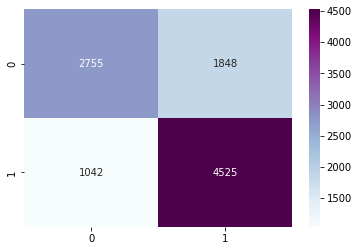

In [ ]:
cmrfc = confusion_matrix(y_test,predictions_RFC)
sns.heatmap(cmrfc,cmap='BuPu',annot=True,fmt='d')

In [ ]:
print(classification_report(y_test, predictions_RFC))

              precision    recall  f1-score   support

           0       0.73      0.60      0.66      4603
           1       0.71      0.81      0.76      5567

    accuracy                           0.72     10170
   macro avg       0.72      0.71      0.71     10170
weighted avg       0.72      0.72      0.71     10170



# Conclusion

In [ ]:
print('Hasil Akhir')
print('Decision Tree Accuracy:', accuracy_score(y_test, predictions_DT))
print('K Nearest Neighbor Accuracy:', accuracy_score(y_test, predictions_KNN))
print('Random Forest Accuracy:', accuracy_score(y_test, predictions_RFC))

Hasil Akhir
Decision Tree Accuracy: 0.6156342182890856
K Nearest Neighbor Accuracy: 0.591740412979351
Random Forest Accuracy: 0.7158308751229105
